### PART D

### It is the same as part B except for a neural network with:
###  Three hidden layers, each of 10 nodes and ReLU activation function.

In [1]:
import pandas as pd
import numpy as np

Download data

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Predictors are (according to the assignment instructions):

In [3]:
predictors=concrete_data.drop(['Age','Strength'],axis=1)
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


Let's normalize the predictors!

In [4]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569


Target variable is:

In [6]:
target = concrete_data['Strength']

Import keras and its utils for model development

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Network building

In [8]:
n_cols=predictors.shape[1]
print('number of predictor is:',n_cols)

number of predictor is: 7


In [9]:
# define regression model
def regression_model_1():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Model fitting:

In [10]:
#Define train test 
from sklearn.model_selection import train_test_split

train, test = train_test_split(predictors_norm, test_size=0.3,random_state=1)

Check the shape of train and test:

In [11]:
print('train shape {}, test shape{}'.format(train.shape,test.shape))

train shape (721, 7), test shape(309, 7)


Retrieve the target for train and test:

In [12]:
target_train=target[train.index]
target_test=target[test.index]

In [13]:
model_1=regression_model_1()

In [14]:
model_1.fit(train, target_train, epochs=50)

Epoch 1/50
721/721 [==============================] - 4s 6ms/step - loss: 1512.0809: 1s - loss:
Epoch 2/50
721/721 [==============================] - 2s 2ms/step - loss: 1476.7813
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1426.2671
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 1352.8605
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 1243.0247: 0s - loss: 124
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1093.3922
Epoch 7/50
721/721 [==============================] - 2s 2ms/step - loss: 900.4735
Epoch 8/50
721/721 [==============================] - 2s 2ms/step - loss: 678.6972
Epoch 9/50
721/721 [==============================] - 2s 2ms/step - loss: 471.9261
Epoch 10/50
721/721 [==============================] - 2s 3ms/step - loss: 332.4745
Epoch 11/50
721/721 [==============================] - 1s 2ms/step - loss: 274.0588
Epoch 12/50
721/721 [==============================

Evaluation of the model for test set

In [15]:
pred_test=model_1.predict(test)

MSE evaluation

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE for test set target prediction is ',mean_squared_error(target_test, pred_test))

MSE for test set target prediction is  191.60464772917996


Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [17]:
list_mse=[]
for i in range(50):
    print('------------------------')
    print(i)
    #train test splitting
    train_a, test_a = train_test_split(predictors_norm, test_size=0.3)
    y_train=target[train_a.index]
    y_test=target[test_a.index]
    
    #model declaration and fitting
    model_a=regression_model_1()
    model_a.fit(train_a,y_train,epochs=50)
    #mse computation
    mse_a=mean_squared_error(y_test, model_a.predict(test))
    list_mse.append(mse_a)
    
    
    

------------------------
0
Epoch 1/50
721/721 [==============================] - 5s 7ms/step - loss: 1553.3244
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 1532.8849
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1508.4286
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 1474.1587
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 1424.0330
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1348.1725
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 1233.7593
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 1072.3131
Epoch 9/50
721/721 [==============================] - 2s 3ms/step - loss: 854.5349
Epoch 10/50
721/721 [==============================] - 3s 4ms/step - loss: 627.7573
Epoch 11/50
721/721 [==============================] - 2s 3ms/step - loss: 437.3934
Epoch 12/50
721/721 [=============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118209). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 157.5314
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 156.7967
Epoch 47/50
721/721 [==============================] - 3s 4ms/step - loss: 156.6693
Epoch 48/50
721/721 [==============================] - 3s 3ms/step - loss: 156.0151
Epoch 49/50
721/721 [==============================] - 3s 3ms/step - loss: 155.3063
Epoch 50/50
721/721 [==============================] - 3s 4ms/step - loss: 154.8937
------------------------
1
Epoch 1/50
721/721 [==============================] - 4s 6ms/step - loss: 1577.0751
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 1552.2830
Epoch 3/50
721/721 [==============================] - 3s 4ms/step - loss: 1525.2024
Epoch 4/50
721/721 [==============================] - 3s 4ms/step - loss: 1486.3784
Epoch 5/50
721/721 [==============================] - 2s 2ms/step - loss: 1421.8904
Epoch 6/50
721/721 [==============================] - 2s 2ms/

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158209). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 176.1876A: 0s - loss: 176.573
Epoch 33/50
721/721 [==============================] - 3s 4ms/step - loss: 174.9653A: 1s -
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 174.3474
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 173.2387
Epoch 36/50
721/721 [==============================] - 3s 3ms/step - loss: 172.3877A: 1s - los
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 172.3211
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 171.0532
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 170.3936
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 169.5611
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 168.7946
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 168.0571
Epoch 43/50
721/721 [============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.260031). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139291). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 307.8970A: 0s - loss: 305.
Epoch 12/50
721/721 [==============================] - 3s 4ms/step - loss: 276.6321
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 258.3463
Epoch 14/50
721/721 [==============================] - 2s 3ms/step - loss: 244.4424
Epoch 15/50
721/721 [==============================] - 2s 3ms/step - loss: 233.9856
Epoch 16/50
721/721 [==============================] - 1s 2ms/step - loss: 226.8476
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 221.3049
Epoch 18/50
721/721 [==============================] - 2s 3ms/step - loss: 215.6294
Epoch 19/50
721/721 [==============================] - 2s 3ms/step - loss: 211.7948
Epoch 20/50
721/721 [==============================] - 2s 3ms/step - loss: 208.4591
Epoch 21/50
721/721 [==============================] - 2s 3ms/step - loss: 205.7394
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - l

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180254). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 181.4188
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 180.4484
Epoch 41/50
721/721 [==============================] - 3s 4ms/step - loss: 178.9581
Epoch 42/50
721/721 [==============================] - 3s 4ms/step - loss: 178.7764
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 177.7745
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 177.1026
Epoch 45/50
721/721 [==============================] - 1s 2ms/step - loss: 176.8926
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 175.9056
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 175.3626
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 174.9047
Epoch 49/50
721/721 [==============================] - 2s 2ms/step - loss: 174.3113A: 1s - loss
Epoch 50/50
721/721 [==============================] - 2s 3ms/step - loss: 1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125513). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 236.0295
Epoch 14/50
721/721 [==============================] - 2s 2ms/step - loss: 223.9391
Epoch 15/50
721/721 [==============================] - 2s 3ms/step - loss: 215.9864
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 210.1680
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 205.5655
Epoch 18/50
721/721 [==============================] - 2s 2ms/step - loss: 202.0438
Epoch 19/50
721/721 [==============================] - 2s 2ms/step - loss: 198.9424
Epoch 20/50
721/721 [==============================] - 3s 4ms/step - loss: 196.6259A: 1s - loss
Epoch 21/50
721/721 [==============================] - 2s 3ms/step - loss: 194.0533
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 192.0199
Epoch 23/50
721/721 [==============================] - 2s 3ms/step - loss: 189.9902
Epoch 24/50
721/721 [==============================] - 3s 4ms/step - loss: 1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119749). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 183.1560
Epoch 30/50
721/721 [==============================] - 3s 4ms/step - loss: 182.2775
Epoch 31/50
721/721 [==============================] - 3s 4ms/step - loss: 181.3720
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 180.4345
Epoch 33/50
721/721 [==============================] - 3s 4ms/step - loss: 179.6159
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 179.3717
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 178.1843
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 177.7225
Epoch 37/50
721/721 [==============================] - 3s 4ms/step - loss: 176.7865
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 176.0515
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 175.4663
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 175.0243
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138948). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 187.5330
Epoch 32/50
721/721 [==============================] - 3s 4ms/step - loss: 186.2045
Epoch 33/50
721/721 [==============================] - 3s 5ms/step - loss: 184.7303
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 183.6226
Epoch 35/50
721/721 [==============================] - 1s 2ms/step - loss: 182.4137
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 181.2082
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 180.0527
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 178.9583
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 178.1892
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 177.0983
Epoch 41/50
721/721 [==============================] - 3s 3ms/step - loss: 176.2802
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 175.3704
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120800). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 191.8190
Epoch 27/50
721/721 [==============================] - 3s 4ms/step - loss: 190.6129A: 0s - loss: 192.
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 188.8339
Epoch 29/50
721/721 [==============================] - 3s 4ms/step - loss: 187.5377
Epoch 30/50
721/721 [==============================] - 3s 4ms/step - loss: 186.2161
Epoch 31/50
721/721 [==============================] - 3s 4ms/step - loss: 185.0292
Epoch 32/50
721/721 [==============================] - 3s 4ms/step - loss: 184.4876
Epoch 33/50
721/721 [==============================] - 2s 3ms/step - loss: 183.0818
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 182.3267
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 181.3125
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 180.8113
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - l

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120571). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 176.1216
Epoch 44/50
721/721 [==============================] - 2s 2ms/step - loss: 175.6063
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 175.0317
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 174.4810
Epoch 47/50
721/721 [==============================] - 2s 3ms/step - loss: 174.3917
Epoch 48/50
721/721 [==============================] - 3s 4ms/step - loss: 173.4054
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 172.9901
Epoch 50/50
721/721 [==============================] - 1s 2ms/step - loss: 172.5830
------------------------
12
Epoch 1/50
721/721 [==============================] - 8s 11ms/step - loss: 1551.6251
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 1531.8046
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1501.2612
Epoch 4/50
721/721 [==============================] - 2s 3m

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200787). Check your callbacks.
  % delta_t_median)


128/721 [====>.........................] - ETA: 3s - loss: 171.0386

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170372). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139958). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 5s 7ms/step - loss: 193.8981
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 191.3662
Epoch 25/50
721/721 [==============================] - 3s 4ms/step - loss: 189.8223A: 1s -
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 187.1442
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 185.3397
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 183.4409
Epoch 29/50
721/721 [==============================] - 3s 4ms/step - loss: 181.6761
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 180.2632
Epoch 31/50
721/721 [==============================] - 3s 4ms/step - loss: 179.2282
Epoch 32/50
 64/721 [=>............................] - ETA: 2s - loss: 177.1082

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119844). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 177.4535
Epoch 33/50
721/721 [==============================] - 2s 3ms/step - loss: 176.2729
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 175.0502
Epoch 35/50
721/721 [==============================] - 3s 4ms/step - loss: 174.0347
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 172.9644
Epoch 37/50
721/721 [==============================] - 3s 4ms/step - loss: 171.6572
Epoch 38/50
721/721 [==============================] - 3s 4ms/step - loss: 170.3878
Epoch 39/50
721/721 [==============================] - 3s 4ms/step - loss: 169.3754
Epoch 40/50
721/721 [==============================] - 3s 4ms/step - loss: 168.3501
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 167.9595A:
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 166.3418
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 165.4148
Ep

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100001). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 160.2672
Epoch 50/50
721/721 [==============================] - 2s 3ms/step - loss: 159.3693
------------------------
14
Epoch 1/50
721/721 [==============================] - 11s 15ms/step - loss: 1545.9309
Epoch 2/50
721/721 [==============================] - 3s 5ms/step - loss: 1503.0682
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1444.7150
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 1364.3790
Epoch 5/50
721/721 [==============================] - 3s 3ms/step - loss: 1249.7987
Epoch 6/50
721/721 [==============================] - 3s 4ms/step - loss: 1092.2054
Epoch 7/50
721/721 [==============================] - 3s 3ms/step - loss: 889.8923
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 661.2353
Epoch 9/50
721/721 [==============================] - 2s 3ms/step - loss: 455.1853A: 0s - loss: 4
Epoch 10/50
721/721 [=========================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102837). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 205.0855
Epoch 18/50
721/721 [==============================] - 3s 4ms/step - loss: 201.5254
Epoch 19/50
721/721 [==============================] - 3s 4ms/step - loss: 198.4061
Epoch 20/50
721/721 [==============================] - 3s 4ms/step - loss: 196.3031
Epoch 21/50
721/721 [==============================] - 3s 4ms/step - loss: 193.4886
Epoch 22/50
721/721 [==============================] - 3s 4ms/step - loss: 191.0772A: 0s - loss: 192.5
Epoch 23/50
721/721 [==============================] - 2s 3ms/step - loss: 189.0236
Epoch 24/50
721/721 [==============================] - 3s 4ms/step - loss: 187.1842
Epoch 25/50
721/721 [==============================] - 2s 2ms/step - loss: 185.8012
Epoch 26/50
721/721 [==============================] - 3s 4ms/step - loss: 183.9155A: 2s
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 182.8216
Epoch 28/50
721/721 [==============================] - 2s 3ms/st

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106066). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 168.3359
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 167.7217
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 166.9375
Epoch 45/50
721/721 [==============================] - 3s 4ms/step - loss: 166.3219
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 165.9488
Epoch 47/50
721/721 [==============================] - 2s 3ms/step - loss: 165.0469
Epoch 48/50
721/721 [==============================] - 3s 4ms/step - loss: 164.5579
Epoch 49/50
721/721 [==============================] - 2s 2ms/step - loss: 164.2121A: 0s - loss: 172.
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 163.7987
------------------------
15
Epoch 1/50
721/721 [==============================] - 9s 12ms/step - loss: 1512.0104
Epoch 2/50
721/721 [==============================] - 3s 4ms/step - loss: 1496.0243
Epoch 3/50
721/721 [=====================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180650). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 179.2073
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 178.2927
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 177.2622
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 176.3736
Epoch 33/50
721/721 [==============================] - 2s 3ms/step - loss: 175.4043
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 175.1152
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 173.6511
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 172.8619
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 171.9497
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 171.3940
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 170.5831
Epoch 40/50
721/721 [==============================] - 3s 4ms/step - loss: 170.0002
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180104). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 165.0914
Epoch 41/50
721/721 [==============================] - 3s 4ms/step - loss: 164.1226
Epoch 42/50
721/721 [==============================] - 3s 3ms/step - loss: 163.1430
Epoch 43/50
721/721 [==============================] - 3s 4ms/step - loss: 162.2624
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 161.5984
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 160.6869
Epoch 46/50
721/721 [==============================] - 3s 3ms/step - loss: 159.8827
Epoch 47/50
721/721 [==============================] - 3s 4ms/step - loss: 159.1773
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 158.7032
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 157.6565 2s
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 157.1353
------------------------
18
Epoch 1/50
721/721 [==============================] - 12s

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119437). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 174.6693
Epoch 32/50
721/721 [==============================] - 3s 4ms/step - loss: 173.5981
Epoch 33/50
721/721 [==============================] - 2s 3ms/step - loss: 172.6233
Epoch 34/50
721/721 [==============================] - 2s 2ms/step - loss: 171.9635
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 170.8406
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 170.0978
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 169.2529
Epoch 38/50
721/721 [==============================] - 3s 4ms/step - loss: 168.3816
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 167.5688
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 166.8618
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 166.4453
Epoch 42/50
721/721 [==============================] - 3s 4ms/step - loss: 165.6906
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156940). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 178.1078
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 177.2087
Epoch 36/50
721/721 [==============================] - 3s 4ms/step - loss: 176.2418
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 175.6714A: 0s - l
Epoch 38/50
721/721 [==============================] - 3s 3ms/step - loss: 174.2758
Epoch 39/50
721/721 [==============================] - 3s 4ms/step - loss: 173.7126
Epoch 40/50
721/721 [==============================] - 3s 4ms/step - loss: 173.3133
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 172.5174
Epoch 42/50
721/721 [==============================] - 3s 4ms/step - loss: 171.3588
Epoch 43/50
721/721 [==============================] - 3s 5ms/step - loss: 170.7290
Epoch 44/50
721/721 [==============================] - 3s 4ms/step - loss: 169.8110
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 169.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118485). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 182.1365
Epoch 22/50
721/721 [==============================] - 3s 4ms/step - loss: 180.2167
Epoch 23/50
721/721 [==============================] - 3s 4ms/step - loss: 178.4270
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 176.6000
Epoch 25/50
721/721 [==============================] - 3s 4ms/step - loss: 174.9484
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 172.8504
Epoch 27/50
721/721 [==============================] - 3s 4ms/step - loss: 171.4182
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 169.9830
Epoch 29/50
721/721 [==============================] - 3s 3ms/step - loss: 168.1972
Epoch 30/50
721/721 [==============================] - 3s 4ms/step - loss: 166.6334
Epoch 31/50
721/721 [==============================] - 3s 5ms/step - loss: 164.8975
Epoch 32/50
721/721 [==============================] - 3s 4ms/step - loss: 163.4646
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118371). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 180.2002
Epoch 27/50
721/721 [==============================] - 3s 3ms/step - loss: 178.9130
Epoch 28/50
721/721 [==============================] - 3s 4ms/step - loss: 177.6133
Epoch 29/50
721/721 [==============================] - 2s 3ms/step - loss: 176.9189
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 176.0837
Epoch 31/50
721/721 [==============================] - 2s 2ms/step - loss: 174.9832
Epoch 32/50
721/721 [==============================] - 2s 2ms/step - loss: 174.2213A: 0s - loss:
Epoch 33/50
721/721 [==============================] - 2s 2ms/step - loss: 173.4350
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 172.7138
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 172.4094
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 171.6645
Epoch 37/50
721/721 [==============================] - 3s 4ms/step - loss: 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160755). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 196.0894
Epoch 22/50
721/721 [==============================] - 3s 3ms/step - loss: 194.8620
Epoch 23/50
721/721 [==============================] - 2s 3ms/step - loss: 192.8780
Epoch 24/50
721/721 [==============================] - 3s 4ms/step - loss: 191.7803
Epoch 25/50
721/721 [==============================] - 3s 5ms/step - loss: 190.2737
Epoch 26/50
721/721 [==============================] - 3s 5ms/step - loss: 189.0698
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 187.6925
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 186.7569
Epoch 29/50
721/721 [==============================] - 3s 4ms/step - loss: 185.8852
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 185.0092
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 183.9638
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 183.0072
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200772). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100927). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 171.9762
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 171.3440
Epoch 50/50
721/721 [==============================] - 2s 3ms/step - loss: 170.8360
------------------------
29
Epoch 1/50
721/721 [==============================] - 13s 17ms/step - loss: 1593.1705
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 1574.2198
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1555.8822
Epoch 4/50
721/721 [==============================] - 3s 5ms/step - loss: 1533.0889: 0s - loss:
Epoch 5/50
721/721 [==============================] - 3s 4ms/step - loss: 1501.6638
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1457.9312
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 1391.9260
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 1297.6028
Epoch 9/50
721/721 [==========================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119449). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 358.0367
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 302.0404
Epoch 17/50
721/721 [==============================] - 2s 2ms/step - loss: 264.9933
Epoch 18/50
721/721 [==============================] - 3s 4ms/step - loss: 241.5144
Epoch 19/50
721/721 [==============================] - 4s 5ms/step - loss: 227.1023
Epoch 20/50
721/721 [==============================] - 3s 4ms/step - loss: 216.8487
Epoch 21/50
721/721 [==============================] - 3s 4ms/step - loss: 209.7624
Epoch 22/50
721/721 [==============================] - 3s 4ms/step - loss: 204.5648
Epoch 23/50
721/721 [==============================] - 3s 4ms/step - loss: 199.4617
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 195.9379
Epoch 25/50
721/721 [==============================] - 3s 4ms/step - loss: 192.6049
Epoch 26/50
721/721 [==============================] - 3s 4ms/step - loss: 190.4358
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102180). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 200.2131
Epoch 23/50
721/721 [==============================] - 2s 2ms/step - loss: 198.3306
Epoch 24/50
721/721 [==============================] - 2s 2ms/step - loss: 195.9444
Epoch 25/50
721/721 [==============================] - 2s 3ms/step - loss: 194.1347
Epoch 26/50
721/721 [==============================] - 2s 2ms/step - loss: 192.5977
Epoch 27/50
721/721 [==============================] - 2s 2ms/step - loss: 190.9531
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 189.2360
Epoch 29/50
721/721 [==============================] - 2s 2ms/step - loss: 188.1691
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 186.9212
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 185.3772
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 184.3024A: 0s - loss: 184.5
Epoch 33/50
721/721 [==============================] - 1s 2ms/step - 

In [18]:
#Mean and standard deviation of list of mse

In [20]:
len(list_mse)

50

In [21]:
import statistics

In [22]:
print('Mean of MSEs collected:',statistics.mean(list_mse))
print('Standard Deviation of MSEs collected:',statistics.stdev(list_mse))

Mean of MSEs collected: 438.3971905637321
Standard Deviation of MSEs collected: 141.84433468632284


This values show that the normalization process of feature inputs and increase of epochs guarantee a better performance.

The mean of MSE is lower than the one of part B. Instead, the standard deviation is higher than in part B: more obscillation in MSE trend through iterations are likely.

It can be useful to plot the trend of MSE through iterations:

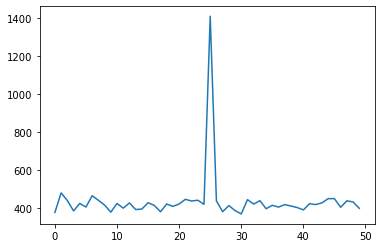

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(50), list_mse)
plt.show()

There is a peak in MSE between the 20th and 30th iteration, causing an increase in standard deviation, while, most of the time, MSEs take similar values (through iterations).